# Basic Use of the LightSensor Module

Import the LightSensor module which should be in the same location as the jupyter file you are using. This is used in all three parts of this example.

In [1]:
from LightSensor import *

Below is a basic look at the functions and what they do of the LightSensor module

In [2]:
sensor = LightSensor() # Creates an sensor object

In [3]:
sensor.getPortName()  # Lists out avaliable ports on your computer

COM1
COM3


In [4]:
sensor.declarePort('COM3') # Declares what port the sensor is connected to. This should be the same port the Arduino connects to.

In [ ]:
sensor.closePort()  # Closes the current port. Only one sensor can use a port at a time.

In [5]:
sensor.setBackground(30)  # reads and records the background light values. Input how long trials run in seconds as parameter

Intensity values being collected...
Intensity values collected successfully.


In [6]:
# gets the background variables, which can be stored into variables if needed.
full, ir, vis, ferr, ierr, verr = sensor.getBackground()

In [7]:
sensor.printBackground()  # prints the background values and the respective error

Background
Full: 7630.707692 ± 0.358766
IR: 1512.569231 ± 0.109565
Visible: 6118.138462 ± 0.322160


In [8]:
sensor.resetBackground()  # resets the background values to zero

In [9]:
# collects intensity, removes any background, caluclates and prints the average and error. Parameter is trial time in seconds.
sensor.dataValues(30)   

Intensity values being collected...
Intensity values collected successfully.
Average
Full: 7633.769231 ± 0.363456
IR: 1512.553846 ± 0.124094
Visible: 6121.215385 ± 0.309693


In [10]:
# gets the average intensity values and error. Can be stored in variables if needed 
fullavg, iravg, visavg, ferr, ierr, verr = sensor.getAverage()

In [11]:
sensor.printAverage()  # Prints out the average and error intensity values

Average
Full: 7633.769231 ± 0.363456
IR: 1512.553846 ± 0.124094
Visible: 6121.215385 ± 0.309693


In [12]:
stdfull, stdir, stdvis = sensor.standardDeviation() # gets just the standard deviation without error

In [13]:
fullavg, iravg, visavg = sensor.average() # gets just the average without error

In [14]:
fullerr, irerr, viserr = sensor.error() # gets just the error without average

In [15]:
full, ir, vis, time = sensor.getRecent() # gets the most recent values contained in the lists, including the time values

# Graph Intensities Over Time

Below is an example of calculating intensity values and ploting them over the time in which they are collected in python. First import the LightSensor module and the needed plotting modules.

In [1]:
# The LightSensor module would be imported here had it not been imported in the very beginning of the code.
import matplotlib.pyplot as plt

Below is a function to make plotting the information overtime easier.

In [2]:
def allPlot(fullvals, irvals, visvals, timevals):
    """Function which plots spectrum values overtime.
    
        fullvals (list): a list of full spectrum light intensity values.
        irvals (list): a list of ir light intensity values.
        visvals (list): a list of visible light intensity values.
        timevals (list): a list of the time values.
        
        return (plot): a plot of all the spectrum values overtime.
    """

    plt.plot(timevals, fullvals, timevals, irvals, timevals, visvals)
    
    plt.xlabel('Time')
    plt.ylabel('Intensity')
    plt.title('Spectrum Intensity Values')

    plt.legend(['Full Spectrum', 'IR', 'Visible'], loc='upper left')
    
    plt.show()

Create a sensor and decare the port in which it is connected.

In [3]:
timesensor = LightSensor()

In [4]:
timesensor.declarePort('COM3')

The background light values should then be collected if wanted. In this example there is no need to print or store the background data.

In [5]:
timesensor.setBackground(30)

Intensity values being collected...
Intensity values collected successfully.


The intensity data for the light source being measured can then be calculated. This function automatically removes the background values from the collected intensity values and prints out the averages and errors.

In [6]:
timesensor.dataValues(30)  

Intensity values being collected...
Intensity values collected successfully.
Average
Full: 1.400000 ± 0.227346
IR: 0.092308 ± 0.110070
Visible: 1.307692 ± 0.204878


We don't want just the average and error for this example, rather we want all the lists containing the raw data collected over time. Therefore, we can use the below function to get the most recent values collected and store them into variables to be used.

In [7]:
fullvals, irvals, visvals, timevals = timesensor.getRecent()

We can then use these lists of values with the above plotting functions to get graphs of the intensities over time.

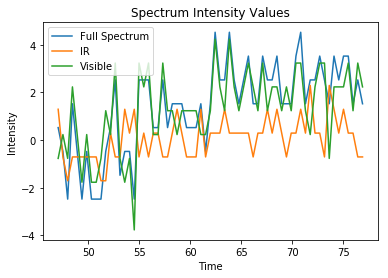

In [8]:
allPlot(fullvals, irvals, visvals, timevals)

# Reading Averages and Exporting to Excel

This is an example of collecting intensity data at certain positions, getting the averages with error, and exporting both the positions and the averages with error to excel. Once again, we begin by importing the LightSensor module.

In [8]:
# The LightSensor module would be imported here had it not been imported in the very beginning of the code.

Below is a function to easily export data to excel.

In [2]:
def csvform(positions, favg, iavg, vavg, ferr, ierr, verr):
    filename = input('Name of File? ') # needs to be csv, ie. filename.csv
    header_row_text = 'Positions, Full, FullError, IR, IRError, Visible, VisibleError'
    comment_text = ''
    
    data = np.array([positions, favg, ferr, iavg, ierr, vavg, verr]).T
    np.savetxt(filename, data, delimiter = ',', header = header_row_text, comments = comment_text)

Create a light sensor object and declare what port it is connected to.

In [3]:
excelsensor = LightSensor()

In [4]:
excelsensor.declarePort('COM3')

Below are empty lists to store the positions, the averages and the respective error collected.

In [11]:
positions = []

favg = []
iavg = []
vavg = []
    
ferr = []
ierr = []
verr = []

Before collecting the intensities of the light source, collect the background lighing intensity.

In [6]:
excelsensor.setBackground(30)

Intensity values being collected...
Intensity values collected successfully.


Below is code that collects the data and stores it into the empty lists until told to stop.

In [ ]:
positionstr = input('Position? ') # For Atomic Spectrum Lab
position = float(positionstr)
positions.append(position)
        
excelsensor.dataValues(30)
fullavg, iravg, visavg, fullerr, irerr, viserr = excelsensor.getAverage() 
        
favg.append(fullavg)
iavg.append(iravg)
vavg.append(visavg)
        
ferr.append(fullerr)
ierr.append(irerr)
verr.append(viserr)

Using the above defined function an excel file can be created using the data collected. It should be noted that the file should be a .csv file in order for it to be opened in excel.

In [ ]:
csvfile = csvform(positions, favg, iavg, vavg, ferr, ierr, verr)